# Distributions

In [1]:
import numpy as np
from scipy.stats import norm, uniform, binom
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

## Probability Distributions

### Normal Distribution
A normal distribution (aka the Gaussian distribution) has:
- Symmetry
- Unimodality (a single most common value)
- A continuous range from $-\infty$ to $+\infty$
- A total area under to the curve of 1 ($P(X) = 1$)
- A common value for the mean, median, and mode

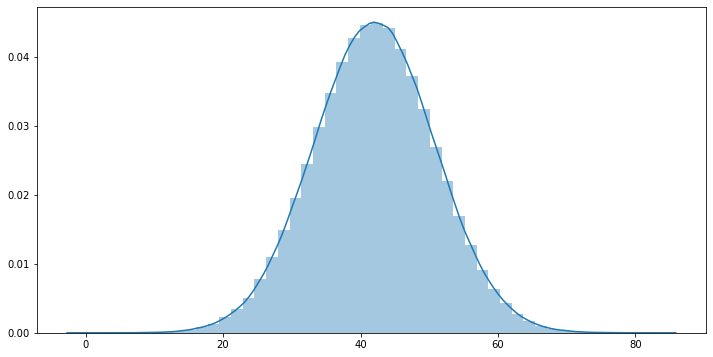

In [2]:
nd = norm.rvs(loc=42, scale=8.8, size=1_000_000)
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.distplot(nd)
plt.show()

### The Standard Normal Distribution
The standard normal distribution has a mean of 0 and standard deviation of 1.

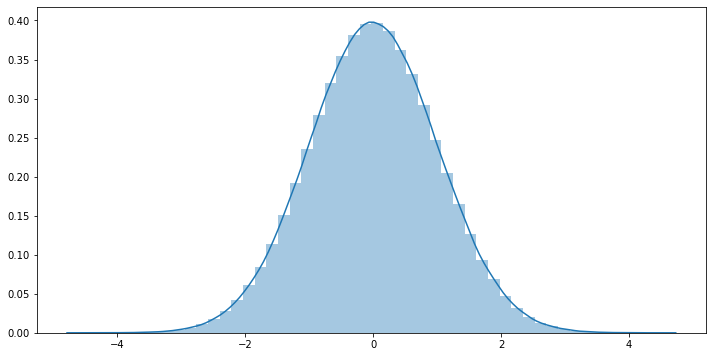

In [3]:
snd = norm.rvs(loc=0.0, scale=1.0, size=1_000_000)
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.distplot(snd)
plt.show()

### The Z-score and Normalization
A Z-score is the distance of a data point from the mean, expressed in units of standard deviation, with the formula:

$$
    Z = \frac{x - \mu}{\sigma}
$$

Z-scores can be used as a conversion, to "normalize" the distribution around 0 on the x-axis.  Two or more normal distributions with different means and standard deviations can be compared.

## Binomial Distributions

### Bernoulli Distribution
A Bernoulli distribution is the simplest form of a binomial distribution and shows the probability outcome of a single trial.

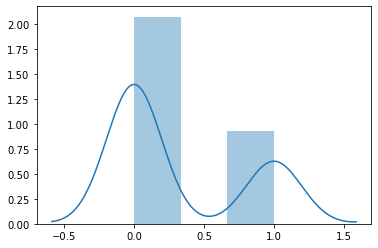

In [4]:
bd = binom.rvs(n=1, p=0.3, size=100)
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.distplot(bd)
plt.show()

### Binomial Distribution
Data must represent:
1. The outcome of each trial is one of two mutually exclusive outcomes.
1. Each trial is independent, so the result of one trial has no influence on the result of any other trial.
1. The probability of success, denoted as $p$, is constant for every trial.
1. There is a fixed number of trials, denoted as $n$.

The formula to calculate the probability of a particular number of successes on a particular number of trials is:

$$
    \begin{pmatrix}
    n \\
    k
    \end{pmatrix} p^k(1-p)^{n-k}
$$

For a combination:

$$
    \begin{pmatrix}
    n \\
    k
    \end{pmatrix}=nCk=\frac{n!}{k!(n-k)!}
$$

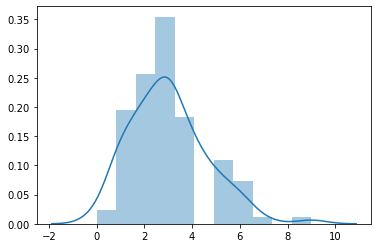

In [5]:
bd1 = binom.rvs(n=10, p=0.3, size=100)
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.distplot(bd1)
plt.show()

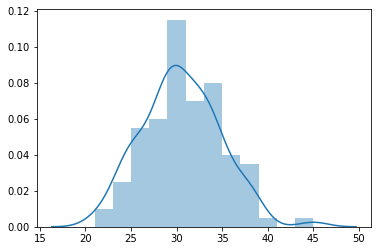

In [6]:
bd2 = binom.rvs(n=100, p=0.3, size=100)
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.distplot(bd2)
plt.show()

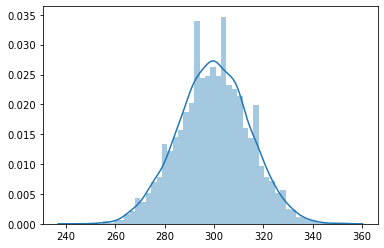

In [7]:
bd3 = binom.rvs(n=1000, p=0.3, size=10000)
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.distplot(bd3)
plt.show()

## The Central Limit Theorem
The central limit theorem stats that the sampling distribution of the sample mean approximates the normal distribution, regardless of the distribution of the population from which the samples are drawn if the sample size is sufficiently large. This fact enables us to make statistical inferences based on the properties of the normal distribution, even if the sample is drawn from a population that is not normally distributed.

Let $X_1,...X_n$ be a random sample from some population with mean $\mu$ and variance $\sigma^2$. Then for large $n$,

$$
    \bar{X}\dot{\sim}N(\mu,\frac{\sigma^2}{n})
$$

Note on equation: the mean of $X$ is approximately ($\dot{\sim}$) normally distributed with mean $\mu$ and variance $\sigma^2/n$.

## Uniform Distribution

$$
    f(x)=\begin{cases}
        \frac{1}{b-a} &\text{for }a \leq x \leq b,\\
        0 &\text{for }x < a \text{ or } x > b
    \end{cases}
$$

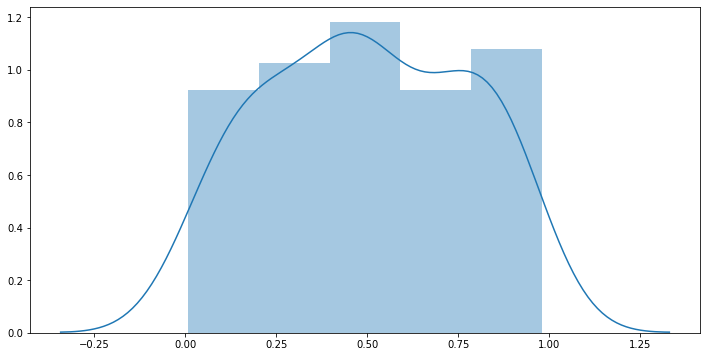

In [8]:
uni = uniform.rvs(loc=0, scale=1, size=100)
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.distplot(uni)
plt.show()

## Poisson Distribution